# **정적 웹 페이지 크롤링/스크레이핑(Scraping)**

**정적 웹 페이지**
*  서버에 미리 저장된 파일이 그대로 전달되는 웹 페이지
*  서버는 사용자가 요청에 해당하는 저장된 웹 페이지를 보냄
* 사용자는 서버에 저장된 데이터가 변경되지 않는 한 고정된 웹 페이지를 보게 됨  

**동적 웹 페이지**
*  서버에 있는 데이터들을 스크립트에 의해 가공처리한 후 생성되어 전달되는 웹 페이지
*  서버는 사용자의 요청을 해석하여 데이터를 가공한 후 생성되는 웹 페이지를 보냄
*  사용자는 상황, 시간, 요청 등에 따라 달라지는 웹페이지를 보게됨

**정적 웹 페이지 크롤링을 위한 BeautifulSoup :**</p>
 https://www.crummy.com/software/BeautifulSoup/bs4/doc/
 </p>
*   Beautiful Soup은 HTML 및 XML 문서를 **구문분석(parsing)**하기위한 Python 패키지
*   HTML의 데이터를 구문 분석 후 구문 분석 트리 구축 가능
*  웹 스크래핑(크롤링)에 사용 


### **HTML 예제**

<html>
 <head>
  <style>
   .re{text-align: center;text-decoration: underline; color: yellow;}
   .top{color: red}
   .menu{color: red}
    #title{color: red;}
  </style>
 </head>
 <body>
  <h1 id="title">
   연구기관 및 대학
  </h1>
  <div class="top">
   <ul class="menu">
    <li>
     <a class="re" href="https://www.nrf.re.kr">
      한국연구재단
     </a>
    </li>
   </ul>
   <ul class="univ">
    <li>
     <a class ='se' href="http://www.ssu.ac.kr/">
      숭실대학교
     </a>
    </li>
    <li>
     <a href="http://www.snu.ac.kr/">
      서울대학교
     </a>
    </li>
   </ul>

   <h2 style="color:green; text-decoration:underline">
    명단
   </h2>

   <table align="left" bgcolor="#00ff00">
    <tr>
     <td>
      학교명
     </td>
     <td>
      주소
     </td>
     <td>
      전화번호
     </td>
    </tr>
    <tr>
     <td>
      숭실대점
     </td>
     <td>
      서울시 동작구 상도로 369
     </td>
     <td>
      02-828-9010
     </td>
    </tr>
   </table>
  </div>
 </body>
</html>

### **CSS 선택자: 태그, id(#), class(.)**

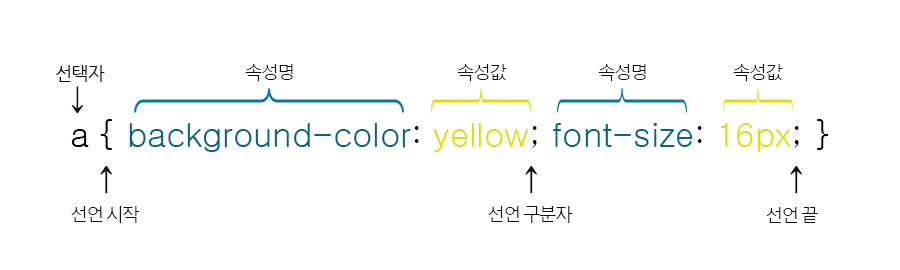

## **BeautifulSoup Exercise**</p>
**1) BeautifulSoup 시작**
</p>
*   BeutifulSoup() 파싱
*   prettify(): html 문서의 계층 구조를 알기 쉽게 보여줍

In [ ]:
from bs4 import BeautifulSoup
html ='<html><head><style>#title{color: red;} .re{text-align: center;text-decoration: underline; color: blue;} .se{text-align: center;text-decoration: underline; color: blue;}</style></head><body><h1 id="title">연구기관 및 대학</h1><div class ="top"><ul class  = "menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul><ul class  = "univ"><li><a  class="re" href="http://www.ssu.ac.kr/">숭실대학교</a></li><li><a  class=se href="http://www.snu.ac.kr/">서울대학교</a></li></ul><h2 id="title">목록</h2><table align="left" bgcolor="#00ff00"><tr><td>학교명</td><td>주소</td><td>전화번호</td></tr><tr><td>숭실대점</td><td>서울시 동작구 상도로 369</td><td>02-828-9010</td></tr></table></body></html>'
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <style>
   #title{color: red;} .re{text-align: center;text-decoration: underline; color: blue;} .se{text-align: center;text-decoration: underline; color: blue;}
  </style>
 </head>
 <body>
  <h1 id="title">
   연구기관 및 대학
  </h1>
  <div class="top">
   <ul class="menu">
    <li>
     <a class="re" href="https://www.nrf.re.kr">
      한국연구재단
     </a>
    </li>
   </ul>
   <ul class="univ">
    <li>
     <a class="re" href="http://www.ssu.ac.kr/">
      숭실대학교
     </a>
    </li>
    <li>
     <a class="se" href="http://www.snu.ac.kr/">
      서울대학교
     </a>
    </li>
   </ul>
   <h2 id="title">
    목록
   </h2>
   <table align="left" bgcolor="#00ff00">
    <tr>
     <td>
      학교명
     </td>
     <td>
      주소
     </td>
     <td>
      전화번호
     </td>
    </tr>
    <tr>
     <td>
      숭실대점
     </td>
     <td>
      서울시 동작구 상도로 369
     </td>
     <td>
      02-828-9010
     </td>
    </tr>
   </table>
  </div>
 </body>
</html>


**2) BS 주요 메서드**
*   **find()**: tag를 이용하여 원하는 부분을 추출. 첫번째 태그를 추출함

In [ ]:
soup.find('td')

<td>학교명</td>

*   **find_all()**: 모든 태그를 추출함. 리스트로 반환

In [ ]:
soup.find_all('td')

[<td>학교명</td>,
 <td>주소</td>,
 <td>전화번호</td>,
 <td>숭실대점</td>,
 <td>서울시 동작구 상도로 369</td>,
 <td>02-828-9010</td>]

In [ ]:
soup.find_all('td')[3].string

'숭실대점'

In [ ]:
tag_ul = soup.find_all('ul')
tag_ul

[<ul class="menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul>,
 <ul class="univ"><li><a class="re" href="http://www.ssu.ac.kr/">숭실대학교</a></li><li><a class="se" href="http://www.snu.ac.kr/">서울대학교</a></li></ul>]

In [ ]:
tag_ul[0]

<ul class="menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul>

In [ ]:
soup.find_all('ul')[0].string

'한국연구재단'

In [ ]:
tag_ul[1].find('li').string

'숭실대학교'

**문자 축출하기(string)**

In [ ]:
tag_ul[0].string

'한국연구재단'

In [ ]:
tag_ul[1].find('li')

<li><a class="re" href="http://www.ssu.ac.kr/">숭실대학교</a></li>

In [ ]:
tag_a = soup.find('a')
tag_a

<a class="re" href="https://www.nrf.re.kr">한국연구재단</a>

In [ ]:
tag_a.string

'한국연구재단'

**속성 활용하기(attrs)**

In [ ]:
tag_a = soup.find('a')
tag_a.attrs # 속성을 확인

{'class': ['re'], 'href': 'https://www.nrf.re.kr'}

In [ ]:
soup.find('a', attrs = {'class':'re' })

<a class="re" href="https://www.nrf.re.kr">한국연구재단</a>

In [ ]:
soup.find(attrs = {'class':'re' })

<a class="re" href="https://www.nrf.re.kr">한국연구재단</a>

In [ ]:
soup.find_all(attrs = {'class':'re' })

[<a class="re" href="https://www.nrf.re.kr">한국연구재단</a>,
 <a class="re" href="http://www.ssu.ac.kr/">숭실대학교</a>]

In [ ]:
soup.find_all(attrs = {'id':'title' })

[<h1 id="title">연구기관 및 대학</h1>, <h2 id="title">목록</h2>]

In [ ]:
# soup.find_all(id = 'title')

**문제1) '숭실대학교' 축출하세요!**

In [ ]:
soup.find_all(attrs = {'clsss': 're'})

[]

*   **select_one()**: CSS Selector로 첫번째 tag 객체를 찾아 추출

In [ ]:
soup.select_one('a.re') # a라는 태그에 re 값을 찾는것, 맨 처음값

<a class="re" href="https://www.nrf.re.kr">한국연구재단</a>

*   **select()**: CSS Selector로 모든 tag 객체를 찾아 추출. 리스트로 반환

In [ ]:
soup.select('a.re')

[<a class="re" href="https://www.nrf.re.kr">한국연구재단</a>,
 <a class="re" href="http://www.ssu.ac.kr/">숭실대학교</a>]

In [ ]:
# 핵심
title_name = soup.select('ul.menu > li') # ul이란 태그에 menu라는 css 내부에 li를 찾아라
title_name

[<li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li>]

In [ ]:
soup.select('body > div.top') # 바디 밑에 있는 것중에 div.top 다찾음

[<div class="top"><ul class="menu"><li><a class="re" href="https://www.nrf.re.kr">한국연구재단</a></li></ul><ul class="univ"><li><a class="re" href="http://www.ssu.ac.kr/">숭실대학교</a></li><li><a class="se" href="http://www.snu.ac.kr/">서울대학교</a></li></ul><h2 id="title">목록</h2><table align="left" bgcolor="#00ff00"><tr><td>학교명</td><td>주소</td><td>전화번호</td></tr><tr><td>숭실대점</td><td>서울시 동작구 상도로 369</td><td>02-828-9010</td></tr></table></div>]

# **정적 웹 페이지 크롤링 예: [1단계] 첫번째 매장 정보만 가져와서 테이블 만들기**</p>

**할리스커피 홈페이지(http://www.hollys.co.kr) 전국매장정보**

**1) 크롤링 허용 여부 확인**</p>

*   수집정책: 크롤링할 주소/robots.txt
*   http://www.robotstxt.org

**2) HTML 코드 확인**</p>

*   오른쪽 마우스 > 페이지 소스 보기
*   Ctrl + U
*  https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=

**3) 코드 작성**
*  하나의 매장 정보만을 축출하여 데이터 프레임을 만들자!

In [ ]:
from bs4 import BeautifulSoup
import urllib.request

In [ ]:
Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store='
Hollys_url

'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store='

In [ ]:
html_response = urllib.request.urlopen(Hollys_url)
html=html_response.read()
html

b'<!DOCTYPE html>\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko">\r\n<head>\r\n\t<title>\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4</title>\r\n\t<meta charset="UTF-8">\r\n\r\n\t<meta name="Subject" content="HOLLYS" />\r\n\t<meta name="Title" content="HOLLYS" />\r\n\t<meta name="Keywords" content="HOLLYS,HOLLYS,\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4,\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4,\xec\xbb\xa4\xed\x94\xbc" />\r\n\t<meta name="Description" content="\xed\x95\xa0\xeb\xa6\xac\xec\x8a\xa4\xeb\x8a\x94 1998\xeb\x85\x84 \xea\xb5\xad\xeb\x82\xb4 \xec\xb2\xab \xec\x97\x90\xec\x8a\xa4\xed\x94\x84\xeb\xa0\x88\xec\x86\x8c \xec\xbb\xa4\xed\x94\xbc\xec\xa0\x84\xeb\xac\xb8\xec\xa0\x90\xec\x9d\x84 \xea\xb0\x9c\xec\xa0\x90\xed\x95\x9c \xec\x88\x9c\xec\x88\x98 \xea\xb5\xad\xeb\x82\xb4\xeb\xb8\x8c\xeb\x9e\x9c\xeb\x93\x9c\xeb\xa1\x9c\xec\x84\x9c \xeb\x8b\xb9\xeb\x8b\xb9\xed\x95\x98\xea\xb2\x8c \xec\x8b\x9c\xec\x9e\xa5 \xec\x84\xa0\xec\xa0\x90\xec\x9d\xb4\xeb\x9d\xbc\xeb\x8a\x94 \xed\x99\x

In [ ]:
soupHollys = BeautifulSoup(html, 'html.parser')
soupHollys
print(soupHollys.prettify())

<!DOCTYPE html>
<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   할리스
  </title>
  <meta charset="utf-8"/>
  <meta content="HOLLYS" name="Subject">
   <meta content="HOLLYS" name="Title"/>
   <meta content="HOLLYS,HOLLYS,할리스,할리스,커피" name="Keywords"/>
   <meta content="할리스는 1998년 국내 첫 에스프레소 커피전문점을 개점한 순수 국내브랜드로서 당당하게 시장 선점이라는 확고한 위치를 확보하고 국내 에스프레소 커피시장을 주도해 나가고 있습니다." name="Description"/>
   <meta content="HOLLYS F&amp;B" name="Author"/>
   <meta content="HOLLYS F&amp;B" name="Publisher"/>
   <meta content="COFFEE,커피,음료,푸드" name="Classification"/>
   <meta content="Korea" name="Location"/>
   <meta content="2015.04.01" name="Author-Date"/>
   <meta content="2022.06.28" name="Date"/>
   <meta content="HOLLYS, HOLLYS F&amp;B" name="Distribution"/>
   <meta content="HOLLYS" name="Copyright"/>
   <meta content="website" property="og:type"/>
   <meta content="할리스" property="og:title"/>
   <meta content="HOLLYS" property="og:description"/>
   <meta conte

In [ ]:
tag_tbody = soupHollys.find('tbody')
tag_tbody

<tbody>
<tr>
<!--
				<td class="noline center_t">
																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
									</td>
				 -->
<td class="noline center_t">부산 사하구</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(997); return false;">부산아트몰링영풍문고점</a></td>
<td class="center_t tdp0">영업중</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(997); return false;">부산광역시 사하구 낙동남로 1413 (하단동, 아트몰링) 13층</a></td>
<td class="center_t">
<img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
</td>
<td class="center_t">051-201-0621</td>
</tr>
<tr>
<!--
				<td class="noline center_t">
																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
									</td>
				 -->
<td class="noline center_t">경기 하남시</td>
<td class="center_t"><a href="#" onclick="ja

In [ ]:
tag_tr=tag_tbody.find_all('tr')
tag_td= tag_tr[0].find_all('td')
tag_td

[<td class="noline center_t">부산 사하구</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(997); return false;">부산아트몰링영풍문고점</a></td>,
 <td class="center_t tdp0">영업중</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(997); return false;">부산광역시 사하구 낙동남로 1413 (하단동, 아트몰링) 13층</a></td>,
 <td class="center_t">
 <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
 </td>,
 <td class="center_t">051-201-0621</td>]

In [ ]:
store_name = tag_td[1].string
store_address =  tag_td[3].string
store_tel =  tag_td[5].string
store_name, store_address, store_tel

('부산아트몰링영풍문고점', '부산광역시 사하구 낙동남로 1413 (하단동, 아트몰링) 13층', '051-201-0621')

In [ ]:
import pandas as pd

Hollys_dic = {'매장이름':[store_name], '주소':[store_address], '전화번호':[store_tel]}

Hollys_store = pd.DataFrame(Hollys_dic)
Hollys_store

,매장이름,주소,전화번호
0,부산아트몰링영풍문고점,"부산광역시 사하구 낙동남로 1413 (하단동, 아트몰링) 13층",051-201-0621


# **정적 웹 페이지 크롤링 실전: [2단계] 전체 매장 크롤링**

for 문을 2번 사용하여 크롤링을 수행한다.

In [1]:
store_n = []
store_addr=[]
store_t=[]

for n in range(1, 55):
  Hollys_url = "https://www.hollys.co.kr/store/korea/korStore2.do?pageNo="+ str(n) +"&sido=&gugun=&store="
  html_response = urllib.request.urlopen(Hollys_url)
  html=html_response.read()
  
  soup = BeautifulSoup(html, 'html.parser')
  tag_tbody = soup.find('tbody')
  tag_tr=tag_tbody.find_all('tr')

  for i in range(len(tag_tr)):
    tag_td=tag_tr[i].find_all('td')
    store_n.append(tag_td[1].string)
    store_addr.append(tag_td[3].string)
    store_t.append(tag_td[5].string)

NameError: ignored

In [ ]:
import pandas as pd

Hollys_dic = {'매장이름':store_n, '주소':store_addr, '전화번호':store_t}

Hollys_store = pd.DataFrame(Hollys_dic)
Hollys_store

In [ ]:
Hollys_store[Hollys_store['매장이름']=='신촌점']

<시험>
퀴즈보다 조금 어렵지만 비슷한 맥락